In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [5]:
pd.DataFrame(X)[0]

,0
0,-0.906226
1,-2.063354
2,1.890853
3,-1.503564
4,-1.112387
...,...
995,-1.978960
996,-1.148432
997,-1.016676
998,1.088194


In [6]:
pd.DataFrame(X)[1]

,1
0,-0.758527
1,-1.798412
2,-1.153483
3,-1.453042
4,1.132962
...,...
995,1.565116
996,1.386503
997,-0.931981
998,-0.124430


In [7]:
df=pd.DataFrame(X,columns=['feature 1','feature 2'])
df['label']=y
df.head()


,feature 1,feature 2,label
0,-0.906226,-0.758527,0
1,-2.063354,-1.798412,0
2,1.890853,-1.153483,0
3,-1.503564,-1.453042,0
4,-1.112387,1.132962,1


<Axes: xlabel='feature 1', ylabel='feature 2'>

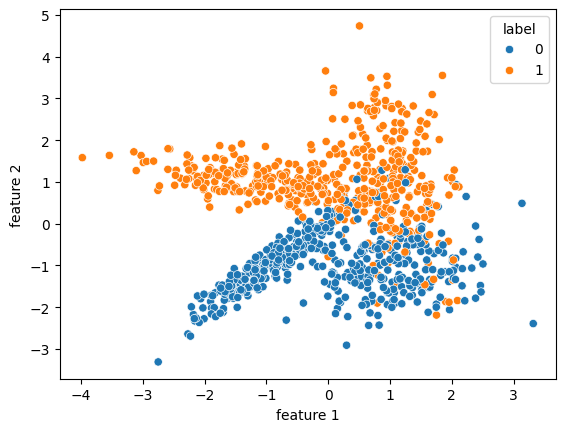

In [8]:
sns.scatterplot(x='feature 1',y='feature 2',hue='label',data=df)



In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [10]:
from sklearn.svm import SVC

In [11]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)


SVC(kernel='linear')

In [12]:
svc.coef_

array([[0.15543601, 1.73933457]])

In [13]:
svc.intercept_


array([-0.11492807])

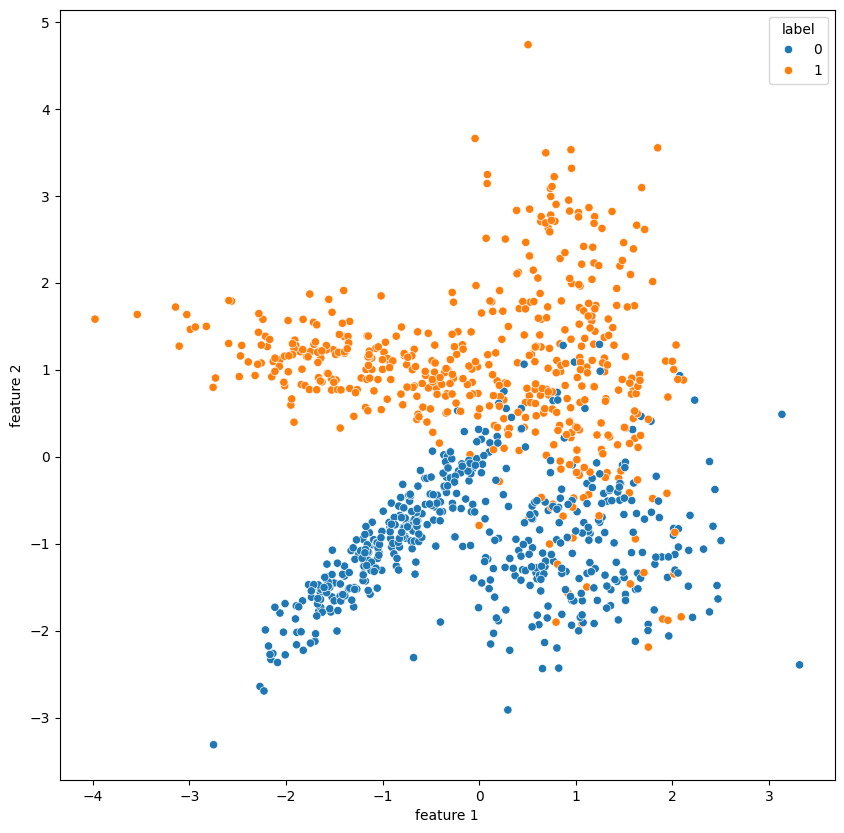

In [14]:
x1_range=np.linspace(df['feature 1'].min(),df['feature 1'].max(),100)
x2_range=np.linspace(df['feature 2'].min(),df['feature 2'].max(),100)
x1_range,x2_range
plt.figure(figsize=(10,10))
sns.scatterplot(x='feature 1',y='feature 2',hue='label',data=df)

plt.savefig('fig12.png')

In [15]:

## Prediction
y_pred=svc.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       109
           1       0.89      0.93      0.91        91

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

[[99 10]
 [ 6 85]]
0.92


In [18]:
rbf=SVC(kernel='rbf')



In [19]:

rbf.fit(X_train,y_train)

SVC()

In [20]:
## Prediction
y_pred1=rbf.predict(X_test)


In [21]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       109
           1       0.89      0.96      0.92        91

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

[[98 11]
 [ 4 87]]


In [22]:

polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
## Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       109
           1       0.86      0.89      0.88        91

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200

[[96 13]
 [10 81]]


In [23]:

sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       109
           1       0.78      0.88      0.82        91

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

[[86 23]
 [11 80]]


In [24]:

sigmoid.intercept_

array([-0.32138807])

Hyperparameter tunung with svc


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf']
}

In [32]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.931 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [34]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       109
           1       0.89      0.96      0.92        91

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

[[98 11]
 [ 4 87]]
